In [1]:
from sys import path
from dolfin import *
from mshr import *
from Python_module_Quang import *
from numpy.core.records import array
from numpy.lib.function_base import append
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import sys
lab_computer = True
if lab_computer: 
    # path of lab's computer
    sys.path.append(
        '/media/xuanquang/Gaumap Lab data/05_Git_project/FEniCS-RBniCS-examples/20210218_2D_tangential_load/'
    )
else:
    # path of MSI laptop
    sys.path.append(
        '/home/xuanquang/Project_Git/FEniCS-RBniCS-examples/20210218_2D_tangential_load/'
    )

try:
    import file
except:
    print("fail to import file")

try:
    import tangential_load
except:
    print("fail to import tangential_load.py")

format = "png"

from mpl_toolkits import mplot3d


In [2]:
def cal_magnitude(ux, uy):
    u_magnitude = []
    for i in range(len(ux)):
        norm = sqrt((ux[i])**2 + (uy[i])**2)
        u_magnitude.append(norm)
    return u_magnitude

In [3]:
""" main """

# import mesh
mesh = Mesh("data/elastic_block.xml")
V = VectorFunctionSpace(mesh, "Lagrange", 1)

u_FE = load_HDF5(V, mesh, title='u_FE')
u_magnitude = cal_u_magnitude(u=u_FE, mesh=mesh)
u_mag = array(u_magnitude.vector().get_local())

V_mag = FunctionSpace(mesh, "Lagrange", 1)

def get_coordinates(V, mesh):
    dof_coordinates = V.tabulate_dof_coordinates()
    # print(dof_coordinates.shape)
    
    n = V.dim()
    d = mesh.geometry().dim()
    dof_coordinates.resize((n, d))

    dof_x = dof_coordinates[:, 0]
    dof_y = dof_coordinates[:, 1]
    return dof_x, dof_y

x, y = get_coordinates(V=V_mag, mesh=mesh)

In [4]:
""" Plot with FEniCS to check if the imported solution is right """
plot_fenics_check = False
if plot_fenics_check:
    # Plot solution u
    plt.figure()
    plot(u_FE, mode="displacement")
    plt.jet()
    plt.colorbar(plot(u_FE, mode="displacement"))

    # Plot mesh
    plt.figure()
    plot(mesh)

    # Plot magnitude of solution
    plt.figure()
    plt.colorbar(plot(u_magnitude))


# plt.show()

len(x): 1174
len(y): 1174
len(u_mag): 1174


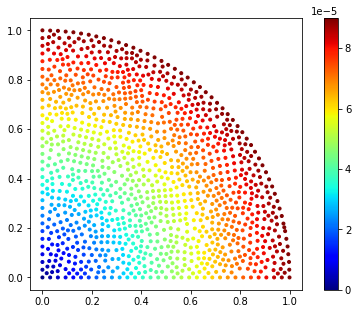

In [9]:
X, Y= x, y
Z = z = u_mag

print(f"len(x): {len(x)}")
# print(x.shape)
print(f"len(y): {len(y)}")
# print(y.shape)
print(f"len(u_mag): {len(u_mag)}")
# print(u_magnitude.shape)

# fig = plt.figure()                                                               
# ax = fig.add_subplot(111) #, projection='3d') 
# ax = plt.subplot(nrows=1, ncols=1, figsize=(6, 6))
def plot_scatter_2D(x, y, z):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    plt.jet()
    # ax.axis("equal")
    ax.set_aspect('equal', 'box')
    # first = ax.scatter(x, y, u_FE.vector().get_local(), c='b', marker='.') 
    # plt.colorbar(first)
    z = u_magnitude.vector().get_local()
    cs = np.arange(len(u_magnitude.vector().get_local())) / len(u_magnitude.vector().get_local())
    p = ax.scatter(x, y, c=z, marker=".") 
    fig.colorbar(p)
    plt.show(block=False)
    plt.close()

plot_scatter_2D(x=x, y=y, z=u_mag)

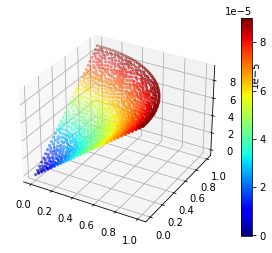

In [6]:
def plot_scatter_3D(x, y, z):
    fig = plt.figure()                                                          
    ax = fig.add_subplot(111, projection='3d')
    # p= ax.scatter(dof_x, dof_y, u.vector().get_local(), c='b', marker='.') 
    p = ax.scatter(x, y, z, c=z, marker=".") 
    fig.colorbar(p)

    plt.show(block=False)
    plt.close()

plot_scatter_3D(x=x, y=y, z=u_mag)



# Implementation of Pandas

In [7]:
import pandas as pd

df = pd.DataFrame({
    'x': array(x),
    'y': array(y),
    'z': u_mag,
})

df.to_csv("solution/sample.csv", index=False)

(1174, 1)


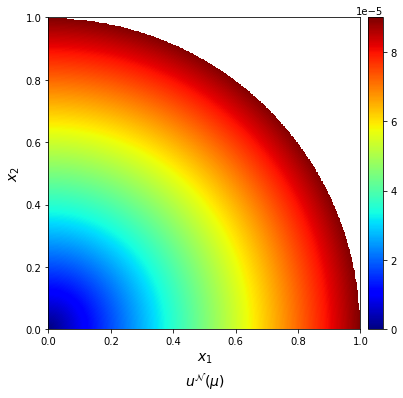

In [8]:
def visualize_solution(x, y, interpolation_point = 500, title="sample"):
    """ Visualize FE solution 
    This function will interpolation FE solution into pixel for visualization
    """
    # Interpolation for 
    xline = np.linspace(0, 1, interpolation_point)
    yline = np.linspace(0, 1, interpolation_point)
    grid_x, grid_y = np.meshgrid(xline, yline)

    # Read solution
    FE_data = pd.read_csv(f'solution/{title}.csv')
    FE_data = FE_data.dropna()
    FE_data.columns = ['x_coord', 'y_coord', 'u_mag']
    FE_points = FE_data[['x_coord', 'y_coord']].values
    FE_mag = FE_data[['u_mag']].values

    print(FE_mag.shape)
    
    # Define plot
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    FE_grid = griddata(FE_points, FE_mag, (grid_x, grid_y))
    FE_grid = FE_grid.reshape(interpolation_point, interpolation_point)
    img1 = ax1.imshow(FE_grid,
                        extent=[x.min(), x.max(), y.min(), y.max()],
                        cmap='jet',
                        origin='lower')
    ax1.set_xlabel(r'$x_1$', fontsize=14)
    ax1.set_ylabel(r'$x_2$', fontsize=14)
    ax1.set_title(r'$u^{\mathcal{N}}({\mu})$',
                    fontsize=14,
                    y=-0.2)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar1 = fig.colorbar(img1, cax=cax)
    cbar1.formatter.set_powerlimits((0, 0))

visualize_solution(x, y, title="sample")